<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/powerball2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

# With Monster Jackpot and rollovers deleted from dataset

In [0]:
import numpy as np
import pandas as pd

# url = 'https://raw.githubusercontent.com/vjmiyagi/DS-Unit-2-Applied-Modeling/master/pb.csv'
url = 'https://raw.githubusercontent.com/vjmiyagi/DS-Unit-2-Applied-Modeling/master/pb2.csv'

df = pd.read_csv(url)

In [21]:
df.head()

,date,b1,b2,b3,b4,b5,pb,pp,tickets,jackpot,winners,rollovers
0,2020158,68,38,69,1,17,18,2.0,10675612,20000000,0,1
1,2020155,64,26,1,3,41,17,2.0,12003071,136400000,1,0
2,2020151,32,13,58,41,60,14,2.0,12966773,125000000,0,15
3,2020148,58,38,59,64,68,21,3.0,11117080,114000000,0,14
4,2020144,2,23,8,18,21,16,4.0,12095670,104000000,0,13


In [22]:
df.isna().sum()

date           0
b1             0
b2             0
b3             0
b4             0
b5             0
pb             0
pp           562
tickets        0
jackpot        0
winners        0
rollovers      0
dtype: int64

In [23]:
df['date'].describe()

count    2.338000e+03
mean     2.008766e+06
std      6.526692e+03
min      1.997309e+06
25%      2.003163e+06
50%      2.009016e+06
75%      2.014234e+06
max      2.020158e+06
Name: date, dtype: float64

In [24]:
df['date']

0       2020158
1       2020155
2       2020151
3       2020148
4       2020144
         ...   
2333    1997323
2334    1997319
2335    1997316
2336    1997312
2337    1997309
Name: date, Length: 2338, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [26]:
df.head()

,date,b1,b2,b3,b4,b5,pb,pp,tickets,jackpot,winners,rollovers
0,2020158,68,38,69,1,17,18,2.0,10675612,20000000,0,1
1,2020155,64,26,1,3,41,17,2.0,12003071,136400000,1,0
2,2020151,32,13,58,41,60,14,2.0,12966773,125000000,0,15
3,2020148,58,38,59,64,68,21,3.0,11117080,114000000,0,14
4,2020144,2,23,8,18,21,16,4.0,12095670,104000000,0,13


In [0]:
target = 'tickets'
features = ['date','jackpot', 'winners','rollovers']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, shuffle=False)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1870, 4), (1870,), (468, 4), (468,))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [31]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1496, 4), (374, 4), (468, 4), (1496,), (374,), (468,))

In [32]:
! pip install category_encoders
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor


In [33]:
X_train.head()

,date,jackpot,winners,rollovers
0,2020158,20000000,0,1
1,2020155,136400000,1,0
2,2020151,125000000,0,15
3,2020148,114000000,0,14
4,2020144,104000000,0,13


In [34]:
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    DecisionTreeRegressor(max_depth=10)
)

pipeline.fit(X_train, y_train)
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Validation accuracy: 0.8046017500122331


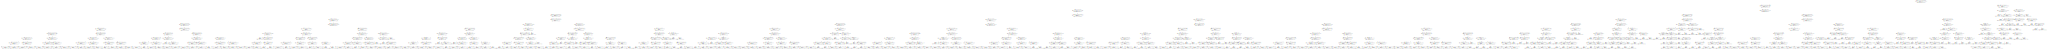

In [35]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeregressor']

dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=y_train.unique(),
    # filled=True,
    # impurity=False,
    # proportion=True
)

graphviz.Source(dot_data)

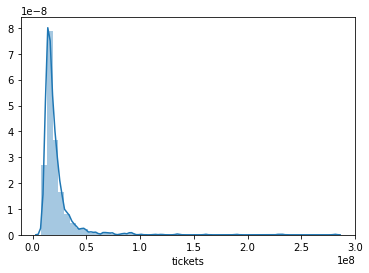

In [36]:
import seaborn as sns
sns.distplot(y_train)

In [37]:
# could it be the monster jackpot is skewing results?

y_train.describe()

count    1.496000e+03
mean     2.165807e+07
std      1.733006e+07
min      7.569646e+06
25%      1.422102e+07
50%      1.717271e+07
75%      2.282736e+07
max      2.815660e+08
Name: tickets, dtype: float64

In [38]:
y_val.describe()

count    3.740000e+02
mean     1.780199e+07
std      1.665791e+07
min      6.689286e+06
25%      1.123154e+07
50%      1.301678e+07
75%      1.662330e+07
max      1.657021e+08
Name: tickets, dtype: float64

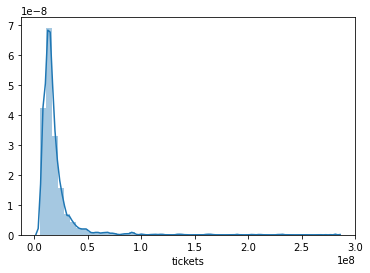

In [40]:
y = df['tickets']
sns.distplot(y);

In [0]:
y_train_log = np.log1p(y_train)
# model.fit(X_train, y_train_log)
# y_pred_log = model.predict(X_val)
# y_pred = np.expm1(y_pred_log)
# print(mean_absolute_error(y_val, y_pred))

In [42]:
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    DecisionTreeRegressor(max_depth=10)
)

pipeline.fit(X_train, y_train_log)
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Validation accuracy: -1.1451389868373547


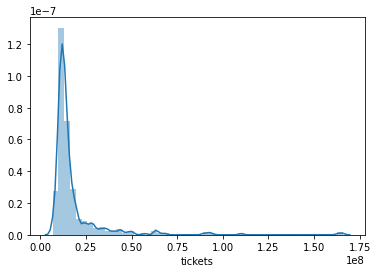

In [43]:
sns.distplot(y_val)

# With monster jackpot included

In [0]:


url = 'https://raw.githubusercontent.com/vjmiyagi/DS-Unit-2-Applied-Modeling/master/pb.csv'
# url = 'https://raw.githubusercontent.com/vjmiyagi/DS-Unit-2-Applied-Modeling/master/pb2.csv'

df = pd.read_csv(url)

In [0]:
df.head()

,date,b1,b2,b3,b4,b5,pb,pp,tickets,jackpot,winners,rollovers
0,2020158,68,38,69,1,17,18,2.0,10675612,20000000,0,1
1,2020155,64,26,1,3,41,17,2.0,12003071,136400000,1,0
2,2020151,32,13,58,41,60,14,2.0,12966773,125000000,0,15
3,2020148,58,38,59,64,68,21,3.0,11117080,114000000,0,14
4,2020144,2,23,8,18,21,16,4.0,12095670,104000000,0,13


In [0]:
df.isna().sum()

date           0
b1             0
b2             0
b3             0
b4             0
b5             0
pb             0
pp           562
tickets        0
jackpot        0
winners        0
rollovers      0
dtype: int64

In [0]:
df['date'].describe()

count    2.358000e+03
mean     1.505883e+06
std      8.157822e+05
min      1.998300e+04
25%      2.018668e+05
50%      2.004296e+06
75%      2.012227e+06
max      2.020158e+06
Name: date, dtype: float64

In [0]:
df['date']

0       2020158
1       2020155
2       2020151
3       2020148
4       2020144
         ...   
2353    1997323
2354    1997319
2355    1997316
2356    1997312
2357    1997309
Name: date, Length: 2358, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df.head()

,date,b1,b2,b3,b4,b5,pb,pp,tickets,jackpot,winners,rollovers
0,2020158,68,38,69,1,17,18,2.0,10675612,20000000,0,1
1,2020155,64,26,1,3,41,17,2.0,12003071,136400000,1,0
2,2020151,32,13,58,41,60,14,2.0,12966773,125000000,0,15
3,2020148,58,38,59,64,68,21,3.0,11117080,114000000,0,14
4,2020144,2,23,8,18,21,16,4.0,12095670,104000000,0,13


In [0]:
target = 'tickets'
features = ['date','jackpot', 'winners','rollovers']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, shuffle=False)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1886, 4), (1886,), (472, 4), (472,))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [0]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1508, 4), (378, 4), (472, 4), (1508,), (378,), (472,))

In [0]:
! pip install category_encoders
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor


In [0]:
X_train.head()

,date,jackpot,winners,rollovers
0,2020158,20000000,0,1
1,2020155,136400000,1,0
2,2020151,125000000,0,15
3,2020148,114000000,0,14
4,2020144,104000000,0,13


In [0]:
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    DecisionTreeRegressor(max_depth=10)
)

pipeline.fit(X_train, y_train)
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

Validation accuracy: 0.5285914702646518


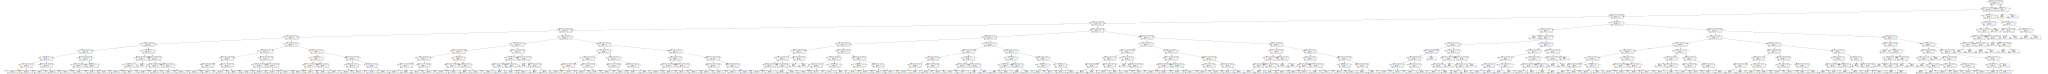

In [0]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeregressor']

dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=y_train.unique(),
    # filled=True,
    # impurity=False,
    # proportion=True
)

graphviz.Source(dot_data)

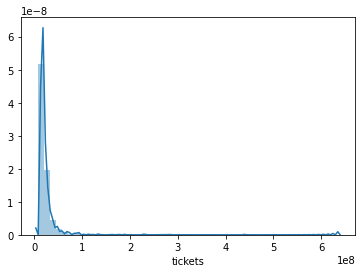

In [0]:
import seaborn as sns
sns.distplot(y_train)

In [0]:
# could it be the monster jackpot is skewing results?

y_train.describe()

count    1.508000e+03
mean     2.245372e+07
std      2.608582e+07
min      7.569646e+06
25%      1.420340e+07
50%      1.718508e+07
75%      2.287054e+07
max      6.351031e+08
Name: tickets, dtype: float64

In [0]:
y_val.describe()

count    3.780000e+02
mean     1.782612e+07
std      1.656786e+07
min      6.689286e+06
25%      1.126131e+07
50%      1.316026e+07
75%      1.668509e+07
max      1.657021e+08
Name: tickets, dtype: float64